In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# For matrix factorization (optional later)
from scipy.sparse import csr_matrix

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the dataset
books_df = pd.read_csv('books.csv')

# Preview the first 5 rows
books_df.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
# Basic info
print("Shape of dataset:", books_df.shape)
print("\nColumn types and nulls:")
print(books_df.info())


Shape of dataset: (10000, 23)

Column types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float

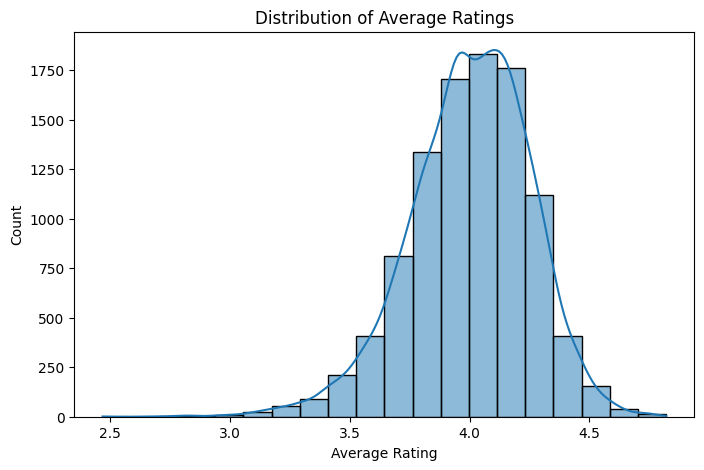

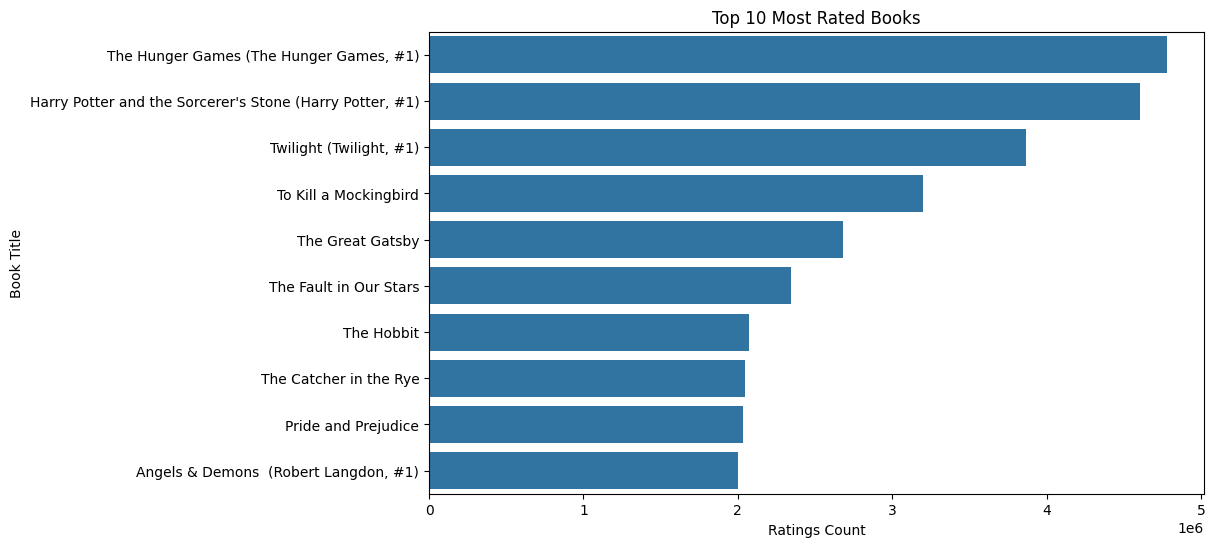

In [ ]:
# Distribution of average ratings
plt.figure(figsize=(8, 5))
sns.histplot(books_df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

# Top 10 most-rated books
top_rated_books = books_df.sort_values(by='ratings_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_count', y='title', data=top_rated_books)
plt.title('Top 10 Most Rated Books')
plt.xlabel('Ratings Count')
plt.ylabel('Book Title')
plt.show()


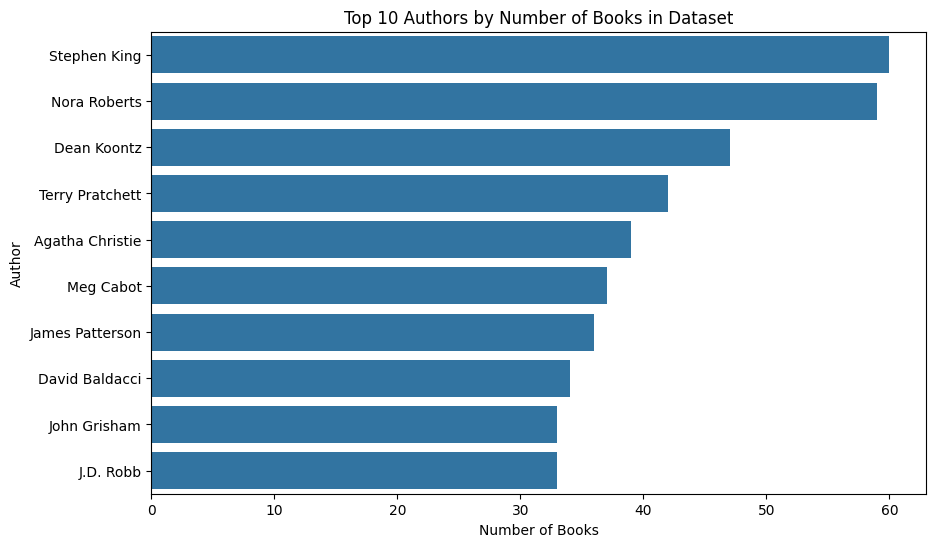

In [ ]:
top_authors = books_df['authors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Authors by Number of Books in Dataset')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


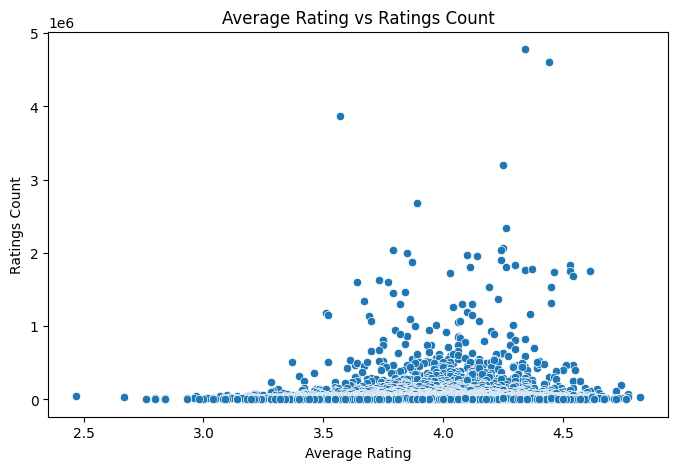

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='average_rating', y='ratings_count', data=books_df)
plt.title('Average Rating vs Ratings Count')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.show()


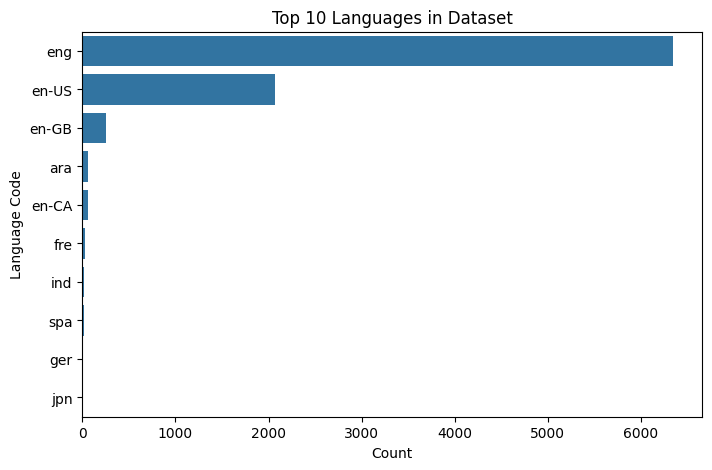

In [ ]:
top_lang = books_df['language_code'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_lang.values, y=top_lang.index)
plt.title('Top 10 Languages in Dataset')
plt.xlabel('Count')
plt.ylabel('Language Code')
plt.show()


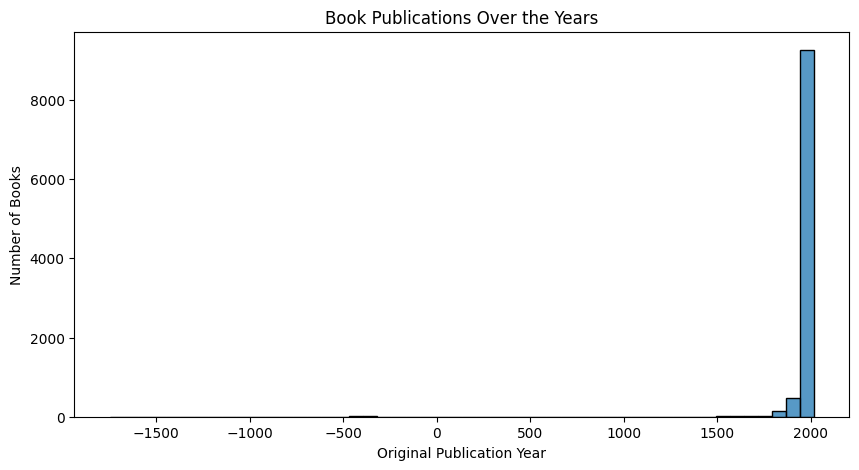

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(books_df['original_publication_year'].dropna(), bins=50)
plt.title('Book Publications Over the Years')
plt.xlabel('Original Publication Year')
plt.ylabel('Number of Books')
plt.show()


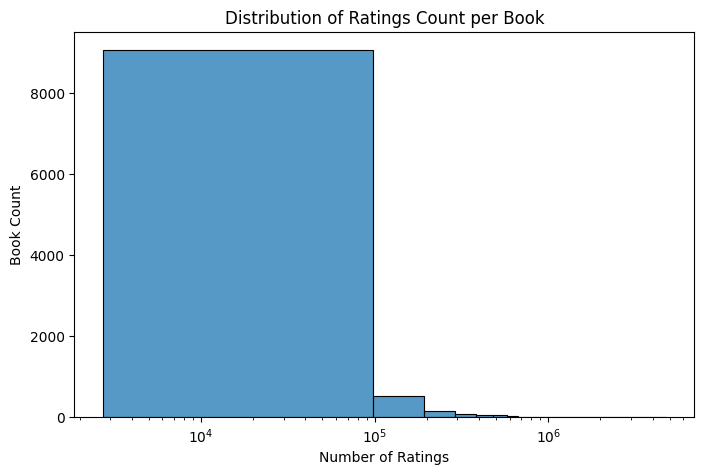

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(books_df['ratings_count'], bins=50)
plt.title('Distribution of Ratings Count per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Count')
plt.xscale('log')  # For better visualization
plt.show()


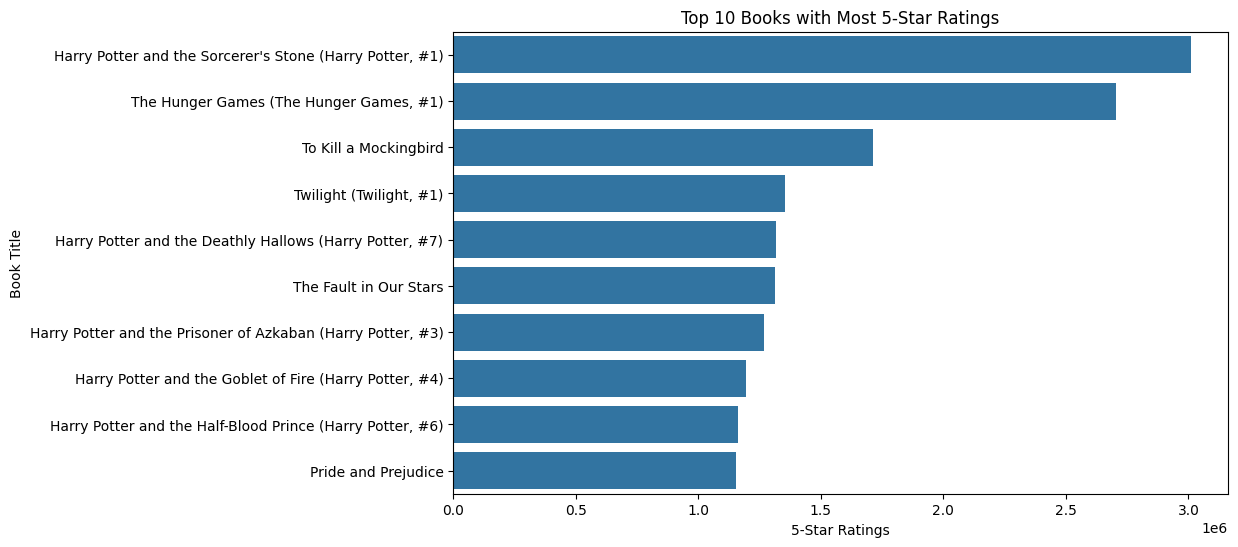

In [ ]:
top_5stars = books_df.sort_values('ratings_5', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings_5', y='title', data=top_5stars)
plt.title('Top 10 Books with Most 5-Star Ratings')
plt.xlabel('5-Star Ratings')
plt.ylabel('Book Title')
plt.show()


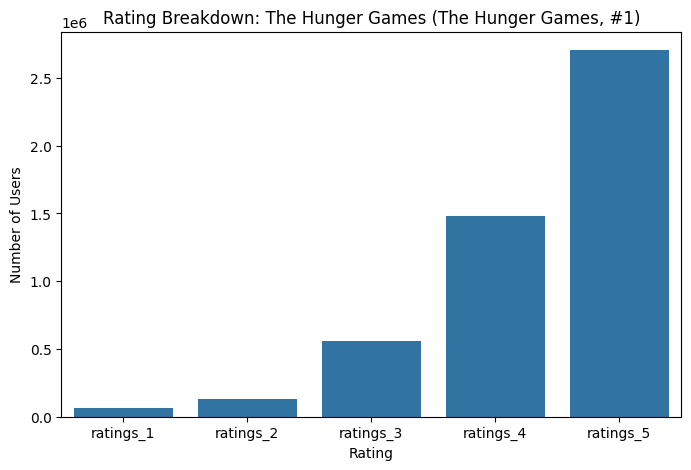

In [ ]:
sample_book = books_df.loc[books_df['title'].str.contains('Hunger Games', case=False)].iloc[0]
ratings_breakdown = sample_book[['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']]

plt.figure(figsize=(8, 5))
sns.barplot(x=ratings_breakdown.index, y=ratings_breakdown.values)
plt.title(f'Rating Breakdown: {sample_book["title"]}')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()


In [ ]:
highly_rated_books = books_df[books_df['ratings_count'] > 1000].sort_values('average_rating', ascending=False).head(10)
print(highly_rated_books[['title', 'authors', 'average_rating', 'ratings_count']])


                                                  title  \
3627                     The Complete Calvin and Hobbes   
861      Words of Radiance (The Stormlight Archive, #2)   
3274  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
7946                                    ESV Study Bible   
8853                           Mark of the Lion Trilogy   
4482  It's a Magical World: A Calvin and Hobbes Coll...   
6360  There's Treasure Everywhere: A Calvin and Hobb...   
421            Harry Potter Boxset (Harry Potter, #1-7)   
3752       Harry Potter Collection (Harry Potter, #1-6)   
6919                The Indispensable Calvin and Hobbes   

                                         authors  average_rating  \
3627                              Bill Watterson            4.82   
861                            Brandon Sanderson            4.77   
3274                 J.K. Rowling, Mary GrandPré            4.77   
7946  Anonymous, Lane T. Dennis, Wayne A. Grudem            4.76   
8853      

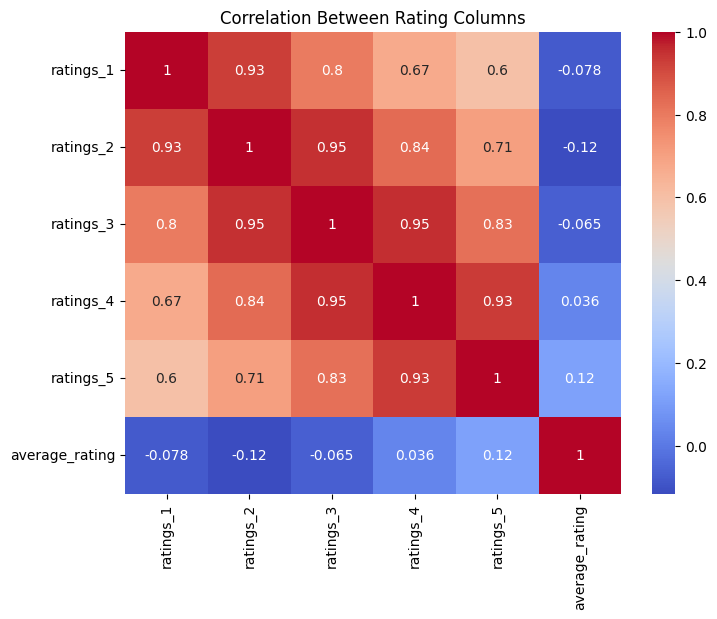

In [ ]:
rating_cols = ['ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'average_rating']
plt.figure(figsize=(8, 6))
sns.heatmap(books_df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Rating Columns')
plt.show()


In [ ]:
# Step 1: Create a new column combining title and author
books_df['combined_features'] = books_df['title'] + ' ' + books_df['authors']

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_df['combined_features'])

# Step 3: Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Build a mapping of book titles to indices
title_to_index = pd.Series(books_df.index, index=books_df['title'].str.lower()).drop_duplicates()


In [ ]:
def recommend_books(title, num_recommendations=5):
    title = title.lower()

    # Check if the title exists in the mapping
    if title not in title_to_index:
        print(f"'{title}' not found in the dataset.")
        return []

    # Get index of the book
    idx = title_to_index[title]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort books based on similarity score (excluding the book itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]

    # Get recommended book indices
    book_indices = [i[0] for i in sim_scores]

    # Return book titles
    return books_df.iloc[book_indices][['title', 'authors', 'average_rating']]


In [ ]:
recommend_books("Harry Potter and the Sorcerer's Stone", 5)


'harry potter and the sorcerer's stone' not found in the dataset.


[]

In [ ]:
import re

def normalize_title(text):
    text = str(text).lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text


In [ ]:
# Apply normalization to titles for consistent lookup
books_df['normalized_title'] = books_df['title'].apply(normalize_title)

# Updated mapping using normalized titles
title_to_index = pd.Series(books_df.index, index=books_df['normalized_title']).drop_duplicates()


In [ ]:
def recommend_books(title, num_recommendations=5):
    normalized_input = normalize_title(title)

    if normalized_input not in title_to_index:
        print(f"'{title}' not found in the dataset.")
        return []

    idx = title_to_index[normalized_input]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    book_indices = [i[0] for i in sim_scores]

    return books_df.iloc[book_indices][['title', 'authors', 'average_rating']]


In [ ]:
recommend_books("Harry Potter and the Sorcerer's Stone")


'Harry Potter and the Sorcerer's Stone' not found in the dataset.


[]

In [ ]:
books_df[books_df['title'].str.lower().str.contains("harry potter", na=False)][['title', 'authors']]


,title,authors
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck"
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré"
22,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré"
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré"
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré"
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
278,Harry Potter and the Cursed Child - Parts One ...,"John Tiffany, Jack Thorne, J.K. Rowling"
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling
2000,Harry Potter: Film Wizardry,Brian Sibley


In [ ]:
def search_titles(keyword):
    keyword = keyword.lower()
    return books_df[books_df['normalized_title'].str.contains(keyword, na=False)][['title', 'authors']]


In [ ]:
search_titles("harry potter")


,title,authors
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré"
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck"
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré"
22,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré"
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré"
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré"
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré"
278,Harry Potter and the Cursed Child - Parts One ...,"John Tiffany, Jack Thorne, J.K. Rowling"
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling
2000,Harry Potter: Film Wizardry,Brian Sibley


In [ ]:
recommend_books("Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 5)


,title,authors,average_rating
2100,"The Harry Potter Collection 1-4 (Harry Potter,...","J.K. Rowling, Mary GrandPré",4.66
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",4.53
22,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré",4.37
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.46
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54


In [ ]:
# Load user-book ratings
ratings_df = pd.read_csv('ratings.csv')

# Preview
ratings_df.head()


,book_id,user_id,rating
0,1,314.0,5.0
1,1,439.0,3.0
2,1,588.0,5.0
3,1,1169.0,4.0
4,1,1185.0,4.0


In [ ]:
# Create a pivot table (user-item matrix)
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='book_id', values='rating')

# Check the shape and some values
print("Shape:", user_item_matrix.shape)
user_item_matrix.head()


Shape: (10875, 1729)


book_id,1,2,3,4,5,6,7,8,9,10,...,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Computing Cosine Similarity Between Books

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill NaNs with 0 for similarity calculation
user_item_filled = user_item_matrix.fillna(0)

# Transpose to get books as rows
book_user_matrix = user_item_filled.T

# Compute cosine similarity between books
book_similarity = cosine_similarity(book_user_matrix)

# Store in DataFrame for easy lookup
book_similarity_df = pd.DataFrame(book_similarity,
                                  index=book_user_matrix.index,
                                  columns=book_user_matrix.index)


## Book-Based Collaborative Filtering Recommender

In [ ]:
def recommend_books_collab(book_id, num_recommendations=5):
    if book_id not in book_similarity_df.index:
        print(f"Book ID {book_id} not found.")
        return []

    # Get similarity scores for the input book
    sim_scores = book_similarity_df[book_id].sort_values(ascending=False)

    # Exclude the book itself
    sim_scores = sim_scores.drop(book_id).head(num_recommendations)

    # Get book details from the main books_df
    recommended_books = books_df[books_df['book_id'].isin(sim_scores.index)][['title', 'authors', 'average_rating']]

    return recommended_books


In [ ]:
recommend_books_collab(1)  # Book ID 1 = The Hunger Games


,title,authors,average_rating
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.46


## Building User-Based Recommendation Function

In [ ]:
def recommend_for_user(user_id, num_recommendations=5):
    if user_id not in user_item_matrix.index:
        print(f"User ID {user_id} not found.")
        return []

    # Fill NaNs with 0 for similarity computation
    user_ratings_filled = user_item_matrix.fillna(0)

    # Compute user similarity
    user_sim = cosine_similarity(user_ratings_filled)
    user_sim_df = pd.DataFrame(user_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

    # Get similar users
    similar_users = user_sim_df[user_id].sort_values(ascending=False).drop(user_id)

    # Weighted ratings prediction
    weighted_scores = np.dot(user_sim_df[user_id].values, user_ratings_filled.values)
    sim_sums = user_sim_df[user_id].sum()

    predicted_ratings = weighted_scores / sim_sums

    # Turn into Series aligned with book_ids
    predicted_ratings_series = pd.Series(predicted_ratings, index=user_item_matrix.columns)

    # Remove books the user has already rated
    already_rated = user_item_matrix.loc[user_id].dropna().index
    recommendations = predicted_ratings_series.drop(already_rated)

    # Top N recommendations
    top_books = recommendations.sort_values(ascending=False).head(num_recommendations)

    # Fetch details from books_df
    return books_df[books_df['book_id'].isin(top_books.index)][['title', 'authors', 'average_rating']]


In [ ]:
recommend_for_user(314.0, 5)  # This user rated The Hunger Games


,title,authors,average_rating
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.46
53,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.20
373,A Short History of Nearly Everything,Bill Bryson,4.19
1975,I'm a Stranger Here Myself: Notes on Returning...,Bill Bryson,3.89
2278,Neither Here nor There: Travels in Europe,Bill Bryson,3.88


In [ ]:
from sklearn.model_selection import train_test_split

# Create a copy of the full ratings
ratings_full = ratings_df.copy()

# Step: convert user_id to integer (to ensure consistency)
ratings_full['user_id'] = ratings_full['user_id'].fillna(0).astype(int) # Fill NaN with 0 before converting

# Group by user and hold out 1 rating for test per user
test_data = ratings_full.groupby('user_id').apply(lambda x: x.sample(1)).reset_index(drop=True)

# Create train data by removing the test interactions
train_data = ratings_full.merge(test_data, on=['user_id', 'book_id', 'rating'], how='outer', indicator=True)
train_data = train_data[train_data['_merge'] == 'left_only'].drop(columns=['_merge'])

# Check shapes
print("Train set shape:", train_data.shape)
print("Test set shape:", test_data.shape)

Train set shape: (161878, 3)
Test set shape: (10876, 3)


In [ ]:
# Pivot table for training matrix
train_user_item_matrix = train_data.pivot_table(index='user_id', columns='book_id', values='rating')

# Fill NaNs with 0 for similarity calculation
train_matrix_filled = train_user_item_matrix.fillna(0)

# Transpose for item similarity
train_book_user_matrix = train_matrix_filled.T

# Compute item-item similarity (same as before but from train data)
from sklearn.metrics.pairwise import cosine_similarity
item_sim_train = cosine_similarity(train_book_user_matrix)

# Turn into DataFrame
item_sim_df_train = pd.DataFrame(item_sim_train,
                                 index=train_book_user_matrix.index,
                                 columns=train_book_user_matrix.index)


## Predicting Top-N Items per User

In [ ]:
def get_top_n_recommendations(user_id, n=10):
    # If user not in training data, return empty
    if user_id not in train_user_item_matrix.index:
        return []

    # Books the user has already rated in training
    rated_books = train_user_item_matrix.loc[user_id].dropna().index.tolist()

    # Predict score for unrated books using item similarity
    user_ratings = train_user_item_matrix.loc[user_id].fillna(0)
    scores = item_sim_df_train.dot(user_ratings)

    # Remove already-rated books from prediction
    scores = scores.drop(index=rated_books, errors='ignore')

    # Top-N recommendations
    top_n_books = scores.sort_values(ascending=False).head(n).index.tolist()
    return top_n_books


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Parameters
TOP_N = 10
hits = 0
total_recommended = 0
total_relevant = len(test_data)  # One relevant item per user

# Loop through each user in test set
for _, row in test_data.iterrows():
    user_id = int(row['user_id'])
    true_book_id = row['book_id']

    recommended_books = get_top_n_recommendations(user_id, n=TOP_N)
    total_recommended += len(recommended_books)

    if true_book_id in recommended_books:
        hits += 1

# Precision@N = hits / total recommendations made
precision_at_n = hits / total_recommended

# Recall@N = hits / total relevant items
recall_at_n = hits / total_relevant

# F1@N = harmonic mean of precision and recall
if precision_at_n + recall_at_n > 0:
    f1_at_n = 2 * (precision_at_n * recall_at_n) / (precision_at_n + recall_at_n)
else:
    f1_at_n = 0.0

# Output results
print(f"Precision@{TOP_N}: {precision_at_n:.4f}")
print(f"Recall@{TOP_N}: {recall_at_n:.4f}")
print(f"F1@{TOP_N}: {f1_at_n:.4f}")


Precision@10: 0.0306
Recall@10: 0.2205
F1@10: 0.0538


## Data Preprocessing for NCF

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode user_id and book_id to indices
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

ratings_df['user_idx'] = user_encoder.fit_transform(ratings_df['user_id'])
ratings_df['book_idx'] = item_encoder.fit_transform(ratings_df['book_id'])

# Split data
train_data_ncf, test_data_ncf = train_test_split(
    ratings_df[['user_idx', 'book_idx', 'rating']],
    test_size=0.2,
    random_state=42
)

# Convert to tensors
X_train = [train_data_ncf['user_idx'].values, train_data_ncf['book_idx'].values]
y_train = train_data_ncf['rating'].values

X_test = [test_data_ncf['user_idx'].values, test_data_ncf['book_idx'].values]
y_test = test_data_ncf['rating'].values

print(f"Train size: {len(y_train)}, Test size: {len(y_test)}")


Train size: 138221, Test size: 34556


## Defining NCF Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define embedding size
embedding_dim = 50

# Input layers
user_input = Input(shape=(1,), name='user_input')
book_input = Input(shape=(1,), name='book_input')

# Embedding layers
user_embedding = Embedding(input_dim=ratings_df['user_idx'].nunique(), output_dim=embedding_dim, name='user_embedding')(user_input)
book_embedding = Embedding(input_dim=ratings_df['book_idx'].nunique(), output_dim=embedding_dim, name='book_embedding')(book_input)

# Flatten embeddings
user_vec = Flatten()(user_embedding)
book_vec = Flatten()(book_embedding)

# Concatenate and add dense layers
concat = Concatenate()([user_vec, book_vec])
dense = Dense(128, activation='relu')(concat)
dense = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dense)
output = Dense(1, activation='linear')(dense)  # Predict the rating

# Build and compile the model
ncf_model = Model(inputs=[user_input, book_input], outputs=output)
ncf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

ncf_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ book_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 50)          │        543,800 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ book_embedding            │ (None, 1, 50)          │         86,450 │ book_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 50)             │              0 │ book_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100)            │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │         12,928 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 651,499 (2.49 MB)

 Trainable params: 651,499 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = ncf_model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 4.2287 - mae: 1.5287 - val_loss: nan - val_mae: nan
Epoch 2/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.7945 - mae: 0.7019 - val_loss: nan - val_mae: nan
Epoch 3/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.7598 - mae: 0.6845 - val_loss: nan - val_mae: nan
Epoch 4/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.7339 - mae: 0.6701 - val_loss: nan - val_mae: nan
Epoch 5/5
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.7099 - mae: 0.6570 - val_loss: nan - val_mae: nan


In [ ]:
# Check for NaNs in test targets
print("NaNs in y_test:", np.isnan(y_test).sum())

# Check target value range
print("Min rating:", np.min(y_test))
print("Max rating:", np.max(y_test))

# Check shapes
print("X_test[0] shape:", np.array(X_test[0]).shape)
print("X_test[1] shape:", np.array(X_test[1]).shape)
print("y_test shape:", y_test.shape)


NaNs in y_test: 1
Min rating: nan
Max rating: nan
X_test[0] shape: (34556,)
X_test[1] shape: (34556,)
y_test shape: (34556,)


In [ ]:
# Identify valid indices (non-NaN targets)
valid_indices = ~np.isnan(y_test)

# Filter X_test and y_test
X_test_clean = [np.array(X_test[0])[valid_indices], np.array(X_test[1])[valid_indices]]
y_test_clean = y_test[valid_indices]


## Retraining with Clean Validation Set

In [ ]:
# Ensure book_id types match
ratings_df['book_id'] = ratings_df['book_id'].astype(int)
books_df['book_id'] = books_df['book_id'].astype(int)

# Filter ratings to only those with book_ids present in books_df
filtered_ratings_df = ratings_df[ratings_df['book_id'].isin(books_df['book_id'])].copy()

print("Original ratings:", ratings_df.shape[0])
print("Filtered ratings:", filtered_ratings_df.shape[0])


Original ratings: 172777
Filtered ratings: 14200


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Re-encode users and books using only filtered ratings
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

filtered_ratings_df['user_idx'] = user_encoder.fit_transform(filtered_ratings_df['user_id'])
filtered_ratings_df['book_idx'] = item_encoder.fit_transform(filtered_ratings_df['book_id'])

# Train-test split
train_data, test_data = train_test_split(
    filtered_ratings_df[['user_idx', 'book_idx', 'rating']],
    test_size=0.2,
    random_state=42
)

# Prepare model inputs
X_train = [train_data['user_idx'].values, train_data['book_idx'].values]
y_train = train_data['rating'].values

X_test = [test_data['user_idx'].values, test_data['book_idx'].values]
y_test = test_data['rating'].values


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Define input sizes
num_users = filtered_ratings_df['user_idx'].nunique()
num_books = filtered_ratings_df['book_idx'].nunique()
embedding_dim = 50

# Input layers
user_input = Input(shape=(1,), name='user_input')
book_input = Input(shape=(1,), name='book_input')

# Embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
book_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim, name='book_embedding')(book_input)

# Flatten
user_vec = Flatten()(user_embedding)
book_vec = Flatten()(book_embedding)

# Concatenate
concat = Concatenate()([user_vec, book_vec])
dense = Dense(128, activation='relu')(concat)
dropout = Dropout(0.3)(dense)
dense = Dense(64, activation='relu')(dropout)
output = Dense(1, activation='linear')(dense)

# Model
ncf_model = Model(inputs=[user_input, book_input], outputs=output)
ncf_model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])

# Train
history = ncf_model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 6.8109 - mae: 2.1313 - val_loss: 0.9267 - val_mae: 0.7568
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8398 - mae: 0.7185 - val_loss: 0.9039 - val_mae: 0.7547
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6858 - mae: 0.6463 - val_loss: 0.9071 - val_mae: 0.7486
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6484 - mae: 0.6210 - val_loss: 0.9330 - val_mae: 0.7533
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6146 - mae: 0.6021 - val_loss: 0.9101 - val_mae: 0.7494


In [ ]:
def recommend_books_ncf(user_id_raw, top_n=10):
    # Check if user exists
    if user_id_raw not in user_encoder.classes_:
        print(f"User ID {user_id_raw} not found in model.")
        return []

    # Convert to internal model index
    user_idx = user_encoder.transform([user_id_raw])[0]

    # All books
    all_book_idxs = set(range(num_books))

    # Books already rated by user
    rated_books = filtered_ratings_df[filtered_ratings_df['user_idx'] == user_idx]['book_idx'].tolist()
    unrated_books = list(all_book_idxs - set(rated_books))

    # Predict for all unrated books
    user_input = np.full(len(unrated_books), user_idx)
    book_input = np.array(unrated_books)

    predictions = ncf_model.predict([user_input, book_input], verbose=0)
    top_indices = predictions.flatten().argsort()[::-1][:top_n]

    # Get top recommended book_idx values
    top_book_idxs = [unrated_books[i] for i in top_indices]

    # Map back to actual book_id using reverse encoding
    top_book_ids = item_encoder.inverse_transform(top_book_idxs)

    # Fetch metadata from books_df
    recs = books_df[books_df['book_id'].isin(top_book_ids)][['title', 'authors', 'average_rating']]
    return recs


In [ ]:
recommend_books_ncf(314, top_n=5)


,title,authors,average_rating
59,The Curious Incident of the Dog in the Night-Time,Mark Haddon,3.85
292,Treasure Island,Robert Louis Stevenson,3.82
892,"Fullmetal Alchemist, Vol. 1 (Fullmetal Alchemi...","Hiromu Arakawa, Akira Watanabe",4.49
2278,Neither Here nor There: Travels in Europe,Bill Bryson,3.88
2317,The Millionaire Next Door: The Surprising Secr...,"Thomas J. Stanley, William D. Danko",4.00


## Defining the Recommendation Function for Gradio

In [ ]:
def ncf_recommender_ui(user_id: int, top_n: int = 5):
    try:
        recs = recommend_books_ncf(user_id, top_n)
        if recs.empty:
            return "No recommendations found for this user."
        return recs
    except Exception as e:
        return f"Error: {str(e)}"


## Building the Gradio Interface

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
how_it_works = """
<div style="font-family: 'Segoe UI', sans-serif; font-size: 16px; line-height: 1.6; color: #F3F4F6; background-color: #111827; padding: 20px; border-radius: 10px; border: 1px solid #333;">
  <h3 style="color: #22D3EE;">🤖 How This Recommendation System Works</h3>

  <p>
    Your personalized book recommendations are powered by <b>Neural Collaborative Filtering (NCF)</b> — a deep learning model that learns your taste from:
  </p>
  <ul style="margin-left: 20px;">
    <li>📌 <b>Your past ratings</b></li>
    <li>📌 <b>Behavior of readers like you</b></li>
  </ul>

  <p>Here's what happens behind the scenes:</p>
  <ol style="margin-left: 20px;">
    <li>Your <b>reading behavior</b> is converted into a unique digital fingerprint.</li>
    <li>Each book is represented based on how users have interacted with it.</li>
    <li>A neural network <b>matches your interests to book traits</b>.</li>
    <li>The system predicts how much you'll enjoy every unseen book.</li>
    <li>We recommend the <b>Top N books</b> with the highest predicted scores!</li>
  </ol>

  <p style="font-style: italic; color: #a1a1aa;">
    💡 It's like having your own personal AI librarian who knows your taste inside out.
  </p>
</div>
"""


In [ ]:
gr.Markdown(how_it_works)


In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## 📚 Book Recommendation System (NCF Powered)")
    gr.Markdown(how_it_works)
    gr.Markdown("Enter a user ID to get personalized book suggestions based on deep learning.")


    user_id_dropdown = gr.Dropdown(choices=valid_user_ids, label="Select a User ID")
    top_n_slider = gr.Number(label="Number of Recommendations", value=5)

    output_table = gr.Dataframe(headers=["Title", "Authors", "Avg Rating"])

    submit_button = gr.Button("Get Recommendations")

    # On click, call the function
    submit_button.click(fn=ncf_recommender_ui, inputs=[user_id_dropdown, top_n_slider], outputs=output_table)

# --- Launch the App ---
demo.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://89475192026ccd4827.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
